Import Libraries

In [1]:
import numpy as np;
import pandas as pan;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
import statsmodels.api as stata;
import matplotlib.pyplot as plotter;
import seaborn as sns;

Configure Settings

In [2]:
sns.set_theme();

Load Data

In [3]:
matrix_data = pan.read_csv("Dataset.csv");
print(matrix_data.head(5));
print(matrix_data.describe(include = "all"));
#since certain datasets do not make sense to be included in the model, we shall drop them
matrix_data = matrix_data.drop(["Model"], axis = 1);
print(matrix_data.describe(include = "all"));
print(matrix_data.isnull().sum());
complete_matrix_data = matrix_data.dropna(axis = 0);#drops rows with missing values
print("\n\n\n\n",complete_matrix_data.describe());

           Brand    Price       Body  Mileage  EngineV Engine Type   
0            BMW   4200.0      sedan      277      2.0      Petrol  \
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4  
             Brand          Price   Body      Mileage      EngineV   
count         4345    4173.000000   4345  4345.000000  4195.000000  \
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean   

Distribution Functions

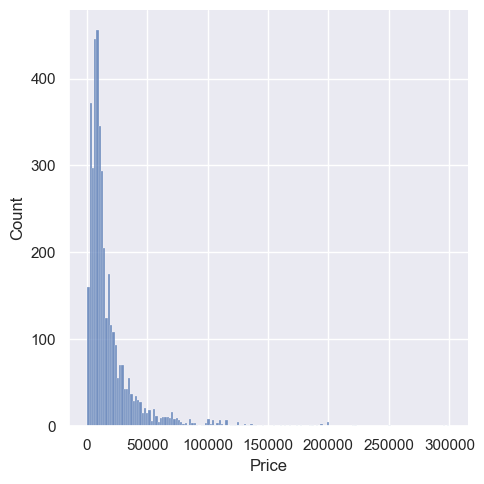

In [4]:
sns.displot(complete_matrix_data["Price"]);

In [5]:
#since outliers are clearly skewing the data we might remove the top 1% of all quantitative values
#in case of manufacture year, we will scrape off the bottom 1% of the data
outliers = complete_matrix_data["Price"].quantile(0.99);
complete_matrix_data = complete_matrix_data[complete_matrix_data["Price"] < outliers];
outliers = complete_matrix_data["Mileage"].quantile(0.99);
complete_matrix_data = complete_matrix_data[complete_matrix_data["Mileage"] < outliers];
complete_matrix_data = complete_matrix_data[complete_matrix_data["EngineV"] < 6.5];
outliers = complete_matrix_data["Year"].quantile(0.01);
complete_matrix_data = complete_matrix_data[complete_matrix_data["Year"] > outliers];
clean_complete_matrix_data = complete_matrix_data.reset_index(drop = True);
print(clean_complete_matrix_data.describe());

               Price      Mileage      EngineV         Year
count    3867.000000  3867.000000  3867.000000  3867.000000
mean    18194.455679   160.542539     2.450440  2006.709853
std     19085.855165    95.633291     0.949366     6.103870
min       800.000000     0.000000     0.600000  1988.000000
25%      7200.000000    91.000000     1.800000  2003.000000
50%     11700.000000   157.000000     2.200000  2008.000000
75%     21700.000000   225.000000     3.000000  2012.000000
max    129222.000000   435.000000     6.300000  2016.000000


OLS Assumptions

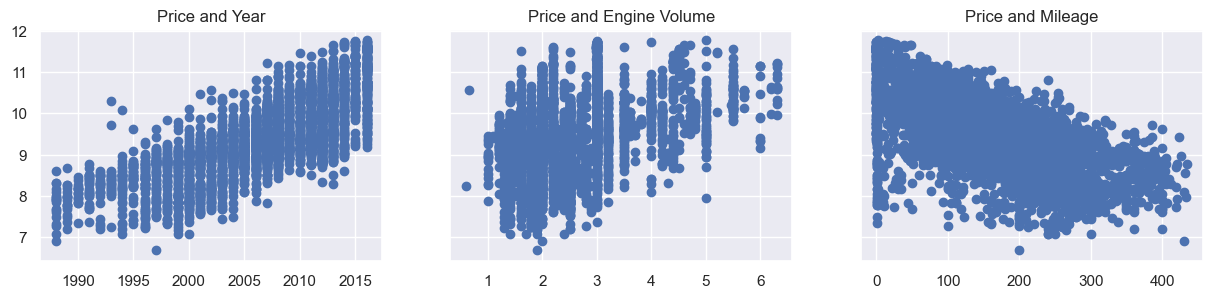

In [9]:
#Linearity
f, (ax1, ax2, ax3) = plotter.subplots(1, 3, sharey=True, figsize = (15, 3));
ax1.scatter(clean_complete_matrix_data["Year"], clean_complete_matrix_data["Log Price"]);
ax1.set_title("Price and Year");
ax2.scatter(clean_complete_matrix_data["EngineV"], clean_complete_matrix_data["Log Price"]);
ax2.set_title("Price and Engine Volume");
ax3.scatter(clean_complete_matrix_data["Mileage"], clean_complete_matrix_data["Log Price"]);
ax3.set_title("Price and Mileage");
plotter.show()

In [7]:
# we shall use log transformations, then drop the now useless "Price" variable
log_price = np.log(clean_complete_matrix_data["Price"]);
clean_complete_matrix_data["Log Price"] = log_price;
clean_complete_matrix_data = clean_complete_matrix_data.drop(["Price"], axis=1);
#the data doesn't violate the endogeneity condition
#the data also is normal(high sample size), and its normality and heteroscedasticity are assured due to the log transformation
#the data is neither a time series data or a panel data, thus it is not useful to check for autocorrelation

In [8]:
print(clean_complete_matrix_data.columns.values);

['Brand' 'Body' 'Mileage' 'EngineV' 'Engine Type' 'Registration' 'Year'
 'Log Price']
